In [39]:
# Import pandas
import pandas as pd

# Column names
col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]

# Load dataset
cc_apps = pd.read_csv("datasets/crx.data", header=None, names=col_names);

# Inspect data
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [40]:
# Import numpy
import numpy as np 

# Inspect missing values in the dataset
cc_apps.tail(17)

# Replace the '?'s with NaN
cc_apps = cc_apps.replace("?", np.nan)

# Inspect the missing values again
cc_apps.tail(17)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [41]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
cc_apps.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [42]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
cc_apps.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [43]:
# Import LabelEncoder
from sklearn import preprocessing
    
# Instantiate LabelEncoder
le = preprocessing.LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes == 'object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
        
cc_apps.tail(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
675,0,248,1.040,2,1,0,8,0.665,0,0,0,0,0,84,237,1
676,0,153,10.665,2,1,11,4,0.085,0,1,12,1,0,40,3,1
677,1,36,7.250,2,1,10,8,0.040,0,1,1,0,0,31,1,1
678,0,20,10.210,2,1,6,3,0.000,0,0,0,0,0,0,50,1
679,0,42,1.250,2,1,2,8,0.000,0,0,0,0,0,0,0,1
680,1,37,0.290,2,1,9,8,0.290,0,0,0,0,0,96,364,1
681,1,125,1.000,3,3,4,4,3.000,0,0,0,0,0,60,537,1
682,1,12,3.290,2,1,7,8,0.335,0,0,0,1,0,44,2,1
683,1,208,0.750,3,3,4,8,0.585,0,0,0,0,0,84,3,1
684,1,240,3.290,2,1,10,8,3.500,0,0,0,1,2,129,0,1


In [51]:
# Correlation matrix
corr_matrix = cc_apps.corr()
corr_matrix['ApprovalStatus'].sort_values(ascending=False)

ApprovalStatus    1.000000
Married           0.191431
BankCustomer      0.187520
Citizen           0.100867
ZipCode           0.094851
Gender            0.028934
Ethnicity        -0.000877
DriversLicense   -0.031625
EducationLevel   -0.130026
Age              -0.133304
Income           -0.175657
Debt             -0.206294
YearsEmployed    -0.322475
CreditScore      -0.406410
Employed         -0.458301
PriorDefault     -0.720407
Name: ApprovalStatus, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c899f28>,
      dtype=object)

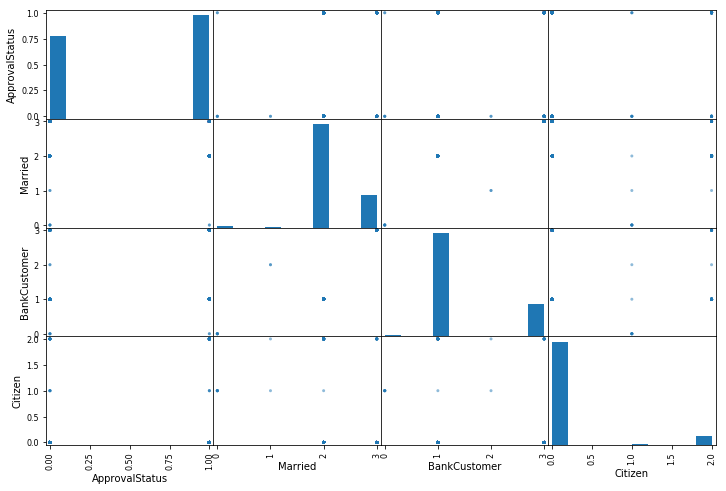

In [49]:
# Not really helpful
from pandas.plotting import scatter_matrix

attributes = ["ApprovalStatus", "Married", "BankCustomer","Citizen"]

scatter_matrix(cc_apps[attributes], figsize=(12, 8))